In [1]:
import uproot
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

In [2]:

file = uproot.open("dati/postFrascati/2p5/Hits.root")
tree = file["Hits"]

data = tree.arrays(library="pd")

Bremm LOr intensity

In [3]:
data1 = data[(data['z'] > 0)]   
data2 = data[(data['z'] < 0)]

print(np.shape(data1))
print(np.shape(data2))

(10699, 12)
(10969, 12)


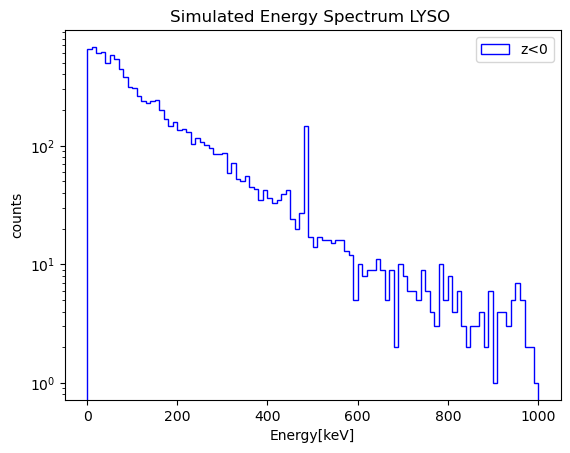

In [4]:
#plt.hist(data1['EDepDet'], bins=100, histtype='step', color='r', label='z>0',range=(0,1))

plt.hist(np.multiply(data2['EDepDet'],1000), bins=100, histtype='step', color='b', label='z<0',range=(0,1000))
#plt.legend()
plt.yscale('log')
plt.xlabel('Energy[keV]')
plt.ylabel('counts')
plt.yscale('log')
plt.title('Simulated Energy Spectrum LYSO ')
plt.legend()
plt.show()
plt.show()


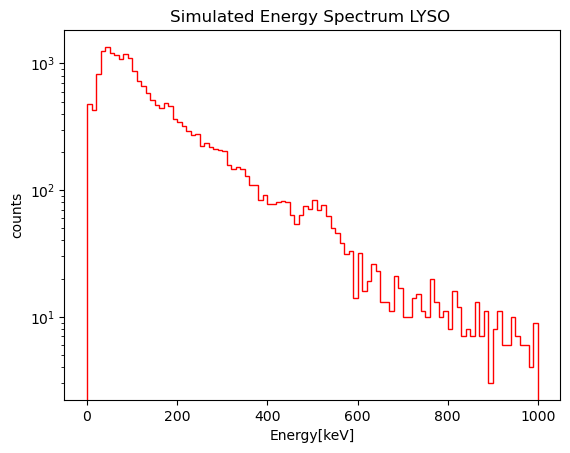

In [4]:

plt.hist(np.random.normal((np.multiply(data['EDepDet'],1000)),0.05*(np.multiply(data['EDepDet'],1000))), bins=100, histtype='step', color='red',range=(0,1000))
#plt.legend()
plt.yscale('log')
plt.xlabel('Energy[keV]')
plt.ylabel('counts')
plt.yscale('log')
plt.title('Simulated Energy Spectrum LYSO ')
plt.show()
plt.show()

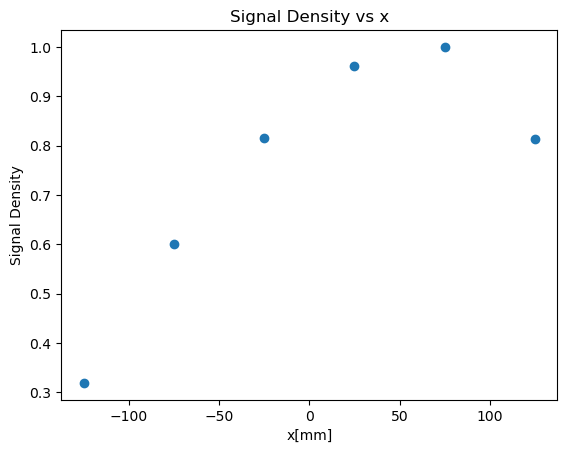

In [82]:
x=[-125,-75,-25,25,75,125]
sig=[4193,7894,10708,12633,13142,10699]
sig=np.array(sig)/np.max(sig)

plt.scatter(x,sig)
plt.xlabel('x[mm]')
plt.ylabel('Signal Density')
plt.title('Signal Density vs x')
plt.show()


Demonstration

(108084,)


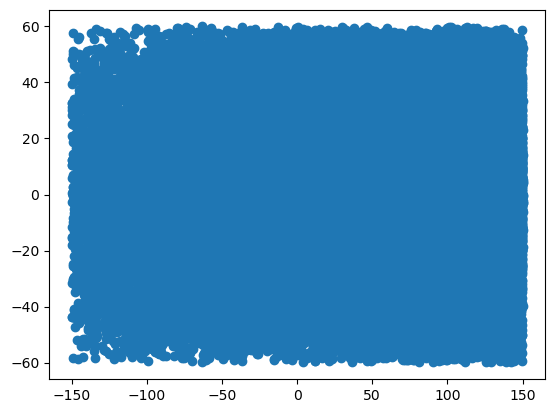

In [43]:
csv_file_path3 = 'gamma_entering_preproc.csv'


df_gamma = pd.read_csv(csv_file_path3, delimiter=',', header=1, names=['Energy', 'X', 'Y', 'Z','pX', 'pY', 'pZ','evt','theta'])

print(np.shape(df_gamma['X']))


plt.scatter(df_gamma['X'], df_gamma['Y'])
#plt.xlim(-150, 150)
#plt.ylim(-100, 100)
plt.show()

In [35]:

mask = ~np.isclose(df_gamma['Energy'], 510.99, atol=0.1 * 510.99)
df_gamma_filtered = df_gamma[mask]



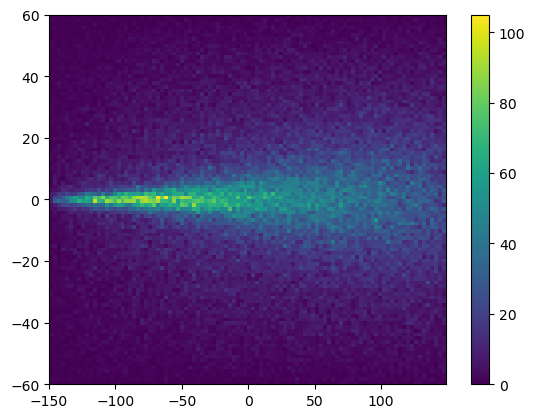

In [44]:
plt.hist2d(df_gamma['X'], df_gamma['Y'], bins=(100,100), cmap='viridis',range=[[-150, 149], [-60, 60]])
plt.colorbar()
plt.show()

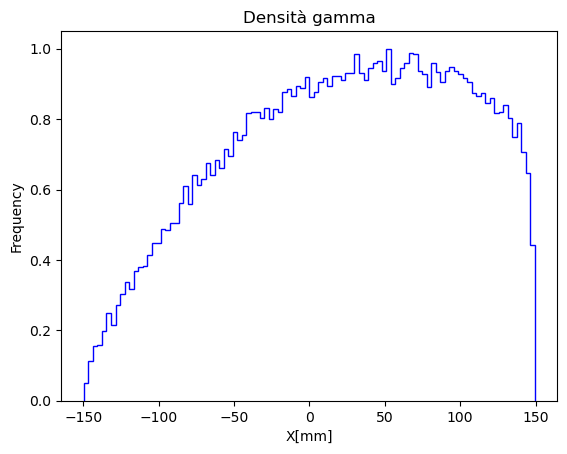

In [45]:
hist2d, x_edges, y_edges = np.histogram2d(df_gamma['X'], df_gamma['Y'], bins=(100, 1), range=[[-151, 151], [-100, 100]])

slice_index = 0

# Extract the slice from the 2D histogram
hist_slice = hist2d[:, slice_index]

hist_slice = hist_slice / np.max(hist_slice)

bin_centers_x = (x_edges[:-1] + x_edges[1:]) / 2

plt.hist(bin_centers_x, weights=hist_slice, color='blue', bins=100,histtype='step')

# Add labels and title
plt.xlabel('X[mm]')
plt.ylabel('Frequency')
plt.title('Densità gamma')

#plt.scatter(x,sig,color='red')

# Show the plot
plt.show()

Angolare

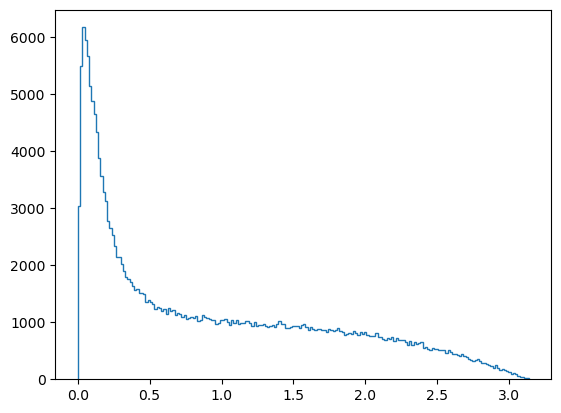

In [7]:
theta=np.arccos(df_gamma['pX']/np.sqrt(df_gamma['pX']**2+df_gamma['pY']**2+df_gamma['pZ']**2))

plt.hist(theta, bins=200, histtype='step')
plt.show()

(87133,)


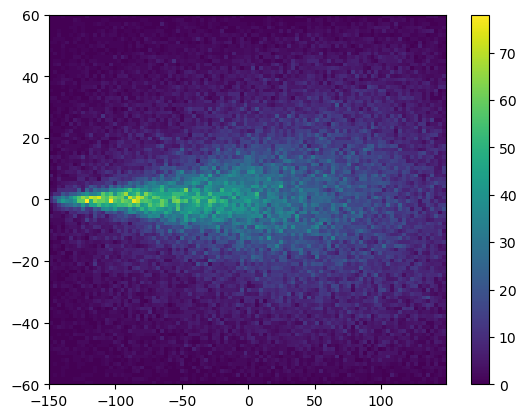

In [8]:
df_gamma['theta']=theta

df_gamma=df_gamma[np.isclose(df_gamma['theta'],1.5,atol=0.5*1.5)]
df_gamma.to_csv('gamma_entering_preproc.csv', index=False)


print(np.shape(df_gamma['X']))


plt.hist2d(df_gamma['X'], df_gamma['Y'], bins=(100,100), cmap='viridis',range=[[-150, 149], [-60, 60]])
plt.colorbar()
plt.show()

In [47]:

file = uproot.open("dati/postFrascati/HitsDose.root")
tree = file["Hits"]

data = tree.arrays(library="pd")

In [57]:


edep= data['EDep']
edep=np.divide(edep,np.max(edep))

xloc= data['xloc'] 

print(np.shape(xloc))


(747090,)


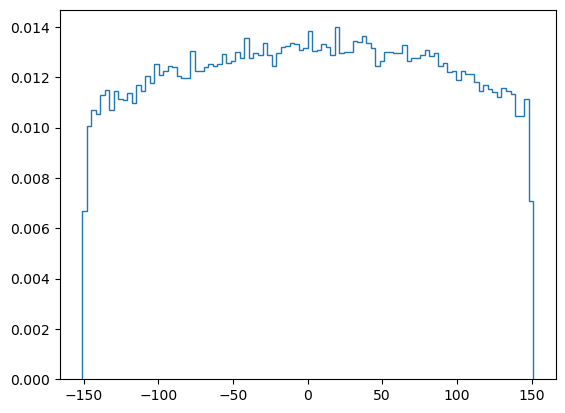

In [58]:
edep=np.array(edep)/17500
#plt.hist(bin_centers_x, weights=hist_slice, color='blue', bins=100,histtype='step')
plt.hist(xloc,weights=edep,bins=100,histtype='step',range=(-151,151))



plt.show()
